## Name: Shivli Mathur
## Reg. no.: 220968298
## Section: DSE-B

## Week1: Iris Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import warnings
warnings.filterwarnings('ignore')

In [2]:
columns = ['col1','col2','col3','col4','label']
df = pd.read_csv('C:\\Users\\Shivli Mathur\\Desktop\\Sem5\\DL Lab\\Week 1\\iris.csv',names=columns)
df.head()

,col1,col2,col3,col4,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.isnull().sum()

col1     0
col2     0
col3     0
col4     0
label    0
dtype: int64

In [5]:
df['label'].value_counts()

label
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [7]:
df['label']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: label, Length: 150, dtype: int32

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

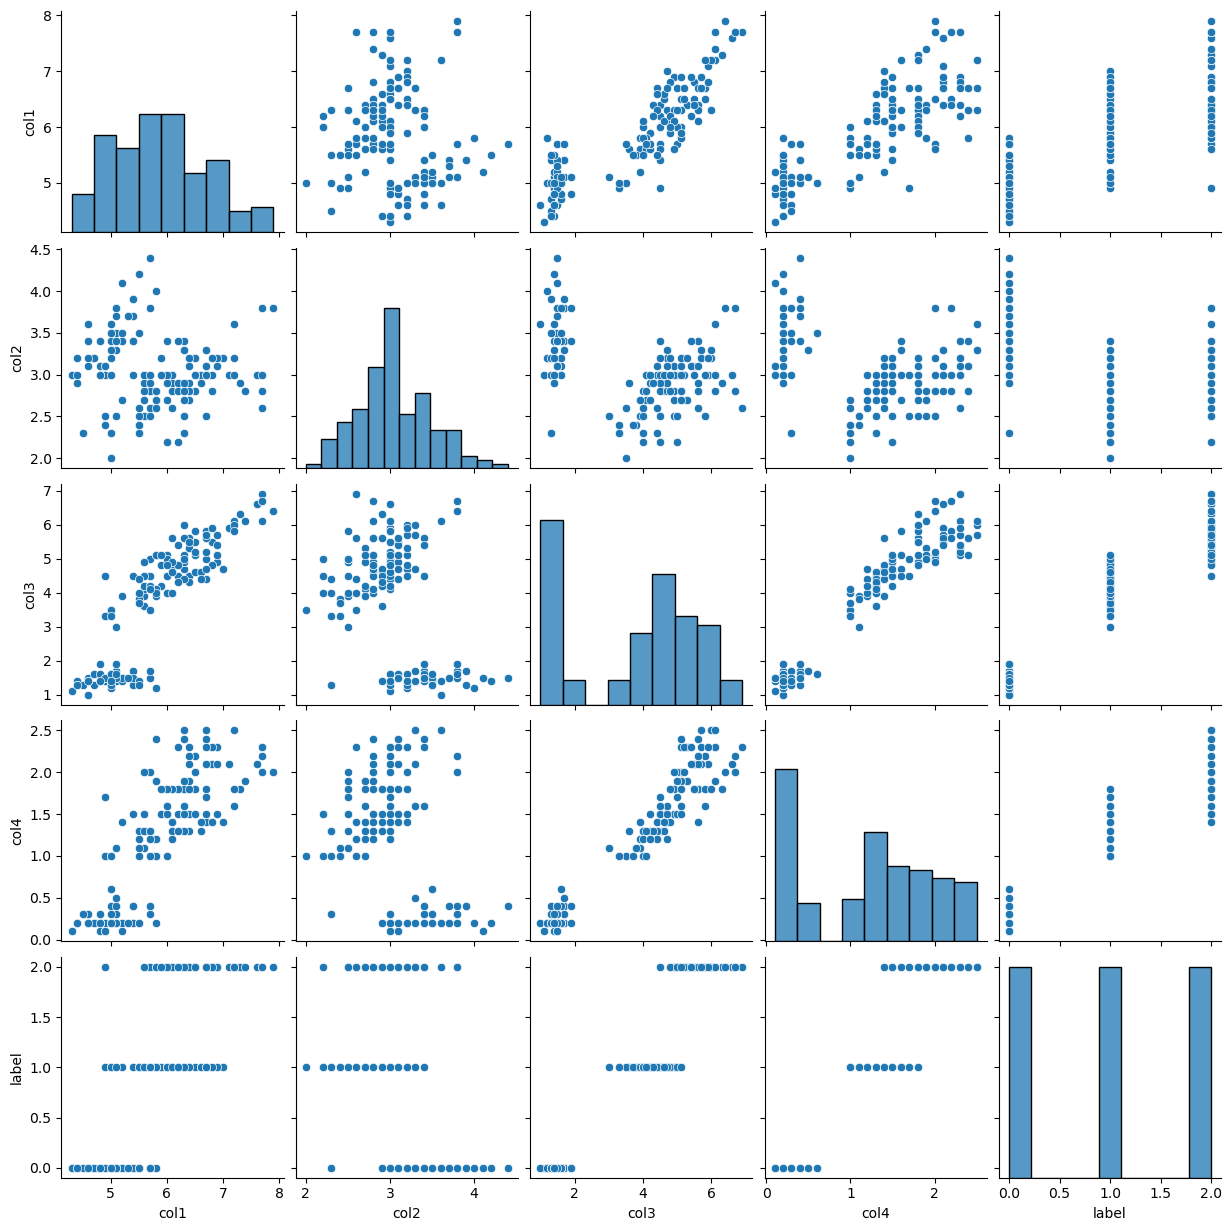

In [9]:
sns.pairplot(df)

In [10]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
y_train

56     1
104    2
69     1
55     1
132    2
      ..
71     1
106    2
14     0
92     1
102    2
Name: label, Length: 135, dtype: int32

In [13]:
#defining the model
num_features = df.shape[1]-1
model = Sequential([
    Input(shape=(num_features,),name='input'),#the shape is (10,) to represent the vector format
    Dense(8, activation='relu',name='d1'),
    Dense(4, activation='relu',name='d2'), 
    Dense(3, activation='softmax')  
])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ d1 (Dense)                           │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ d2 (Dense)                           │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)#setting up the Learning Rate 
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
epochs = 50
batch_size = 32
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.2721 - loss: 1.4357 - val_accuracy: 0.4286 - val_loss: 1.2145
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2408 - loss: 1.2384 - val_accuracy: 0.3571 - val_loss: 1.1474
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2273 - loss: 1.1380 - val_accuracy: 0.3571 - val_loss: 1.0917
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6254 - loss: 1.0021 - val_accuracy: 0.5714 - val_loss: 1.0212
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7856 - loss: 0.9258 - val_accuracy: 0.8571 - val_loss: 0.9414
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9084 - loss: 0.8616 - val_accuracy: 0.9286 - val_loss: 0.8508
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9642 - loss: 0.7740 - val_accuracy: 1.0000 - val_loss: 0.7465
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9294 - loss: 0.6837 - val_accuracy: 1.0000 - val_loss: 0.6315
E

In [17]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9333 - loss: 0.0824
Test Loss: 0.08243491500616074
Test Accuracy: 0.9333333373069763
